In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def suggest_transformation(x,powers=np.arange(0,3,0.5), add=0, message=True):
    from statsmodels.stats.stattools import medcouple
    
    x1=list(x)
    if(sum([type(x1[i]) not in [int,float] for i in range(len(x1))]) >0): 
        if (message==True): print("Cannot transform non-numeric data")
        return
    x=np.array(x)+add
    if ((min(x)<=0) & (message==True)): 
        print("Smallest value of x is 0 or smaller...considering only positive powers for transformations")
        powers = np.arange(1,4) 
        if min(x)==0: powers = np.arange(0.5,3,0.5) # for non-negatives, we can have power=0.5
  
    skewnesses = []
    for p in powers:
        if(p==0): x_trans=np.log10(x)
        else: x_trans=x**p
        skewnesses=skewnesses+[medcouple(x_trans)]
    skewnesses=np.array(skewnesses)
    best_p = powers[np.where(skewnesses==np.min(skewnesses))][0]
    #print(skewnesses)
    if(best_p==0):
        return "Suggested transformation: log10"
    else: 
        return "Suggested transformation: power of "+ str(best_p)
    


    

def convert_categorical(df,denominator=1,do_not_convert=[]):
    
    if df.isna().sum().sum() >0:
        print("\nWarning: dropping all NAs!\n")
        df.dropna(inplace=True)
    
    return pd.get_dummies(df, drop_first=True)
    

    
def scale(df):
    df_scaled=df.copy()
    for col in df.columns:
        x1=list(df[col])
        if(sum([type(x1[i]) not in [int,float] for i in range(len(x1))]) >0): next
        else: df_scaled[col]=(df[col]-df[col].mean())/df[col].std()
    return df_scaled
            
    

In [3]:
df = pd.read_csv("Mall_Customers.csv")

df = df.drop(columns=["CustomerID"])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df_copy = df.copy()

# Scale the last three columns
df_copy = scale(df_copy)

# Convert the categorical column and keep the original "Gender" column
df_copy = convert_categorical(df_copy)
df_copy

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.421003,-1.734646,-0.433713,1
1,-1.277829,-1.734646,1.192711,1
2,-1.349416,-1.696572,-1.711618,0
3,-1.134655,-1.696572,1.037814,0
4,-0.561958,-1.658498,-0.394989,0
...,...,...,...,...
195,-0.275610,2.263112,1.115262,0
196,0.440260,2.491555,-0.859681,0
197,-0.490371,2.491555,0.921640,1
198,-0.490371,2.910368,-1.246925,1


In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_copy) 
print("\nCluster centers:")
print(kmeans.cluster_centers_)



C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster centers:
[[-0.38855859  1.0836674   0.98273884  0.42222222]
 [ 0.86200143 -0.0792599  -0.64795998  0.4673913 ]
 [-0.9812539  -0.65830353  0.24427096  0.41269841]]


C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

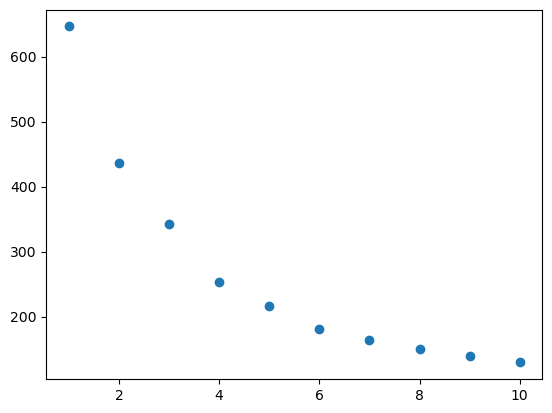

In [6]:
x=np.zeros(10)
for k in range(1,11):
    model = KMeans(n_clusters=k, n_init= 5, init="k-means++") 
    KM = model.fit(df_copy)
    pd.DataFrame(KM.cluster_centers_)
    x[k-1]=KM.inertia_
    
plt.scatter(range(1,11),x)

In [7]:
value_1 = 3 
value_2 = 5  
model_1 = KMeans(n_clusters=value_1, n_init=5, init="k-means++")
KM1 = model_1.fit(df_copy)
model_2 = KMeans(n_clusters=value_2, n_init=5, init="k-means++")
KM2 = model_2.fit(df_copy)

C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Print centroids for KM1 (3 clusters)
print("\nCluster centers for k=3:")
print(KM1.cluster_centers_)
print("\nCluster centers for k=5:")
print(KM2.cluster_centers_)


Cluster centers for k=3:
[[-0.38855859  1.0836674   0.98273884  0.42222222]
 [ 0.8944404  -0.07800916 -0.63551019  0.46666667]
 [-0.96945383 -0.64221859  0.19957952  0.41538462]]

Cluster centers for k=5:
[[ 0.17286167  1.06378438 -1.29476121  0.58823529]
 [-0.77976573 -0.40206024 -0.2153735   0.34042553]
 [ 1.19562713 -0.45982751 -0.32621956  0.43103448]
 [-0.44081102  0.98910098  1.23640011  0.46153846]
 [-0.97195688 -1.32621729  1.12934389  0.40909091]]


In [9]:
preferred_model = KM2
cluster_labels = preferred_model.labels_
df['Cluster'] = cluster_labels
cluster_averages = df.groupby('Cluster').mean()
cluster_averages

C:\Users\16155\AppData\Local\Temp\ipykernel_13896\3150163928.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_averages = df.groupby('Cluster').mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,41.264706,88.500000,16.764706
1,27.957447,50.000000,44.638298
2,55.551724,48.482759,41.775862
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


In [10]:
cluster_gender = df.groupby(['Cluster', 'Genre'], as_index=False).mean()
cluster_gender

,Cluster,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,Female,43.785714,93.285714,20.642857
1,0,Male,39.500000,85.150000,14.050000
2,1,Female,28.903226,50.709677,42.645161
3,1,Male,26.125000,48.625000,48.500000
4,2,Female,53.060606,49.000000,42.363636
5,2,Male,58.840000,47.800000,41.000000
6,3,Female,32.190476,86.047619,81.666667
7,3,Male,33.277778,87.111111,82.666667
8,4,Female,25.461538,25.692308,80.538462
9,4,Male,25.000000,25.777778,77.666667


In [11]:
col=["red", "blue", "green", "cyan", "magenta", "yellow"]


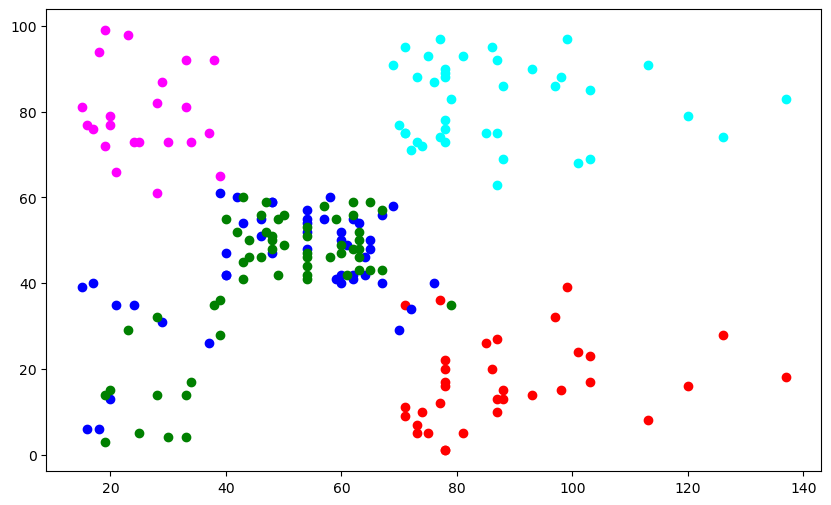

In [12]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
for cluster_id, color in zip(range(len(col)), col):
    cluster_data = df[df['Cluster'] == cluster_id]
    x = cluster_data['Annual Income (k$)']
    y = cluster_data['Spending Score (1-100)']
    plt.scatter(x, y, label=f'Cluster {cluster_id}', c=color)